In [1]:
from metrics.GED_scorer import GED_scorer
from metrics.syn_tree_ged import SynTree_ged
import matplotlib.pyplot as plt
from IPython.display import Image, display

from utils.chem_utils import map_one_reaction


/home/zhichaotan/anaconda3/envs/metrics_guidance_retrosynthesis/lib/python3.10/site-packages/rxnmapper/batched_mapper.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
# Example reaction SMILES with atom mapping
rxn_smi = "COC1=CC=C(C=C1)N.O=CCCC(=O)O.[H]C(=O)C[C@H](C)CO>>[H]C(=O)[C@]([H])([C@H](C)CO)[C@@H](N)CCC(=O)O"
rxn_smi_mapped = map_one_reaction(rxn_smi)

print("Testing reaction-level GED calculation...")
print(f"Reaction SMILES: {rxn_smi_mapped}\n")

# Calculate GED for a single reaction
scorer = GED_scorer(rxn_smi_mapped)
score = scorer.calculate_score()

print(f"GED score for this reaction: {score}")
print(f"Score value: {score}")

Testing reaction-level GED calculation...
Reaction SMILES: COc1ccc([NH2:9])cc1.[CH3:1][C@H:2]([CH2:3][OH:4])[CH2:5][CH:6]=[O:7].O=[CH:8][CH2:10][CH2:11][C:12](=[O:13])[OH:14]>>[CH3:1][C@H:2]([CH2:3][OH:4])[C@@H:5]([CH:6]=[O:7])[C@@H:8]([NH2:9])[CH2:10][CH2:11][C:12](=[O:13])[OH:14]

GED score for this reaction: 7.0
Score value: 7.0


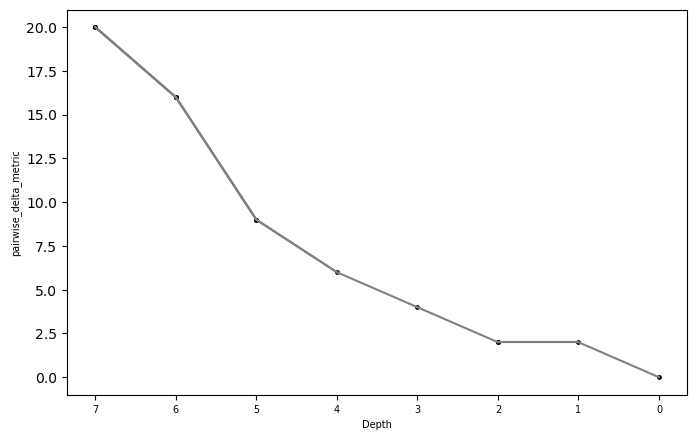

In [3]:
# Example synthetic pathway, which can be atom-mapped or not. If not, every reaction in the route will be atom-mapped using RXNMAPPER.
# GED trajectory plot
example_route = ["C.C=CCC=O.O>>[H]C(=O)C[C@H](C)CO",
                "COC1=CC=C(C=C1)N.O=CCCC(=O)O.[H]C(=O)C[C@H](C)CO>>[H]C(=O)[C@]([H])([C@H](C)CO)[C@@H](N)CCC(=O)O",
                "C=CC.[H]C(=O)[C@]([H])([C@H](C)CO)[C@@H](N)CCC(=O)O>>[H][C@]([C@H](C)CO)([C@H](O)CC=C)[C@@]([H])(N)CCC(=O)O",
                "[H][C@]([C@H](C)CO)([C@H](O)CC=C)[C@@]([H])(N)CCC(=O)O>>[H][C@]([C@H](C)CO)([C@H](O)CC=C)[C@]1([H])CCC(=O)N1",
                "[H][C@]([C@H](C)CO)([C@H](O)CC=C)[C@]1([H])CCC(=O)N1>>[H][C@]1([C@]2([H])CCC(=O)N2)[C@H](C)C(=O)O[C@]1([H])CC=C",
                "[H][C@]1([C@]2([H])CCC(=O)N2)[C@H](C)C(=O)O[C@]1([H])CC=C.Br>>[H][C@]1([C@]2([H])CCC(=O)N2)[C@H](C)C(=O)O[C@]1([H])CCCBr",
                "[H][C@]1([C@]2([H])CCC(=O)N2)[C@H](C)C(=O)O[C@]1([H])CCCBr>>[H][C@]12[C@H](C)C(=O)O[C@]1([H])CCCN1C(=O)CC[C@]12[H]"]

syn_tree = SynTree_ged(route=example_route, track_atom_init=True, add_ged_init=True)
syn_tree.visualize_pathway_metric_changes(output_number=False)
display(Image("metric_trajectory_plot.png"))

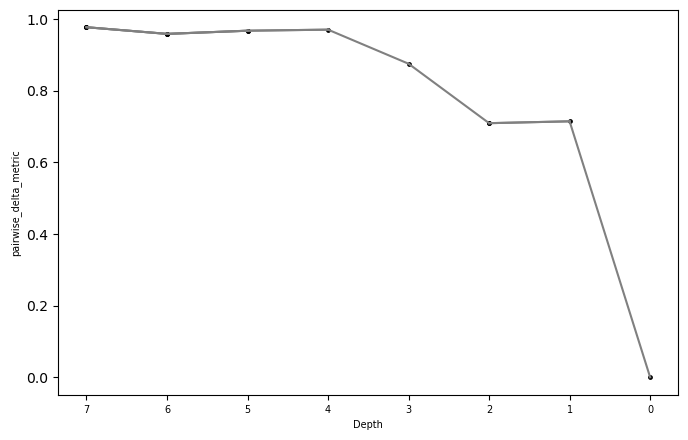

In [ ]:
# Tanimoto trajectory plot
syn_tree = SynTree_ged(route=example_route, track_atom_init=True, add_ged_init=False)
syn_tree.add_pairwise_attributes(metric_name="tanimoto")
syn_tree.visualize_pathway_metric_changes(output_number=False)
display(Image("metric_trajectory_plot.png"))